In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from ucimlrepo import fetch_ucirepo
# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
# print(chronic_kidney_disease.metadata)

# variable information

# print(chronic_kidney_disease.variables)
age_bp_df = pd.DataFrame({
    'age': X['age'],
    'bp': X['bp'],
    'sg': X['sg'],
    'al': X['al'],
    'su': X['su'],
    'bgr': X['bgr'],
    'bu': X['bu'],
    'sod': X['sod'],
    'pot': X['pot'],
    'hemo': X['hemo'],
    'pcv': X['pcv'],
    'wbcc': X['wbcc'],
    'rbcc': X['rbcc']
})

y = y.copy()
y.loc[:, 'class'] = y['class'].replace({'ckd': 'a', 'ckd\t': 'a', 'notckd': 'c'})

# Convert hemoglobin values from g/dl to g/l
age_bp_df['hemo'] = age_bp_df['hemo'].apply(lambda x: x * 10 if pd.notnull(x) else x)

# Combine the datasets after conversion
combined_df = age_bp_df.join(y['class'])

#Counts the missing values in each row
missing_count = combined_df.isnull().sum(axis=1)
filtered_df = combined_df[missing_count < 3]
filtered_df.reset_index(drop=True, inplace=True)

missing_count = combined_df.isnull().sum(axis=1)
filtered_df = combined_df[missing_count < 3]
filtered_df.reset_index(drop=True, inplace=True)

# Split the filtered_df into two DataFrames based on the 'class' column
affected_df = filtered_df[filtered_df['class'] == 'a']
control_df = filtered_df[filtered_df['class'] == 'c']

control_df.reset_index(drop=True, inplace=True)

# Display the updated dataframe
# print(combined_df)

print(f"NNumber of rows left before filtering: {len(combined_df)}")

print(f"Number of rows left after filtering: {len(filtered_df)}")

print(filtered_df)

# Display the DataFrames
print("Affected Individuals DataFrame:")
display(affected_df)
print(f"Number of rows in affected DataFrame: {len(affected_df)}")

print("\nControl Individuals DataFrame:")
display(control_df)
print(f"Number of rows in control DataFrame: {len(control_df)}")


NNumber of rows left before filtering: 400
Number of rows left after filtering: 265
      age     bp     sg   al   su    bgr     bu    sod   pot   hemo   pcv  \
0    48.0   80.0  1.020  1.0  0.0  121.0   36.0    NaN   NaN  154.0  44.0   
1    48.0   70.0  1.005  4.0  0.0  117.0   56.0  111.0   2.5  112.0  32.0   
2    51.0   80.0  1.010  2.0  0.0  106.0   26.0    NaN   NaN  116.0  35.0   
3    60.0   90.0  1.015  3.0  0.0   74.0   25.0  142.0   3.2  122.0  39.0   
4    68.0   70.0  1.010  0.0  0.0  100.0   54.0  104.0   4.0  124.0  36.0   
5    52.0  100.0  1.015  3.0  0.0  138.0   60.0    NaN   NaN  108.0  33.0   
6    53.0   90.0  1.020  2.0  0.0   70.0  107.0  114.0   3.7   95.0  29.0   
7    63.0   70.0  1.010  3.0  0.0  380.0   60.0  131.0   4.2  108.0  32.0   
8    68.0   70.0  1.015  3.0  1.0  208.0   72.0  138.0   5.8   97.0  28.0   
9    68.0   80.0  1.010  3.0  2.0  157.0   90.0  130.0   6.4   56.0  16.0   
10   40.0   80.0  1.015  3.0  0.0   76.0  162.0  141.0   4.9   76.0  

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
1,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
2,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
3,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
4,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
5,52.0,100.0,1.015,3.0,0.0,138.0,60.0,NaN,NaN,108.0,33.0,9600.0,4.0,a
6,53.0,90.0,1.020,2.0,0.0,70.0,107.0,114.0,3.7,95.0,29.0,12100.0,3.7,a
7,63.0,70.0,1.010,3.0,0.0,380.0,60.0,131.0,4.2,108.0,32.0,4500.0,3.8,a
8,68.0,70.0,1.015,3.0,1.0,208.0,72.0,138.0,5.8,97.0,28.0,12200.0,3.4,a
9,68.0,80.0,1.010,3.0,2.0,157.0,90.0,130.0,6.4,56.0,16.0,11000.0,2.6,a


Number of rows in affected DataFrame: 126

Control Individuals DataFrame:


,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
1,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
2,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
3,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
4,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
5,34.0,80.0,1.025,0.0,0.0,121.0,27.0,144.0,3.9,136.0,52.0,9200.0,6.3,c
6,60.0,80.0,1.025,0.0,0.0,131.0,10.0,146.0,5.0,145.0,41.0,10700.0,5.1,c
7,38.0,60.0,1.020,0.0,0.0,91.0,36.0,135.0,3.7,140.0,46.0,9100.0,5.8,c
8,42.0,80.0,1.020,0.0,0.0,98.0,20.0,140.0,3.5,139.0,44.0,8400.0,5.5,c
9,35.0,80.0,1.020,0.0,0.0,104.0,31.0,135.0,5.0,161.0,45.0,4300.0,5.2,c


Number of rows in control DataFrame: 139


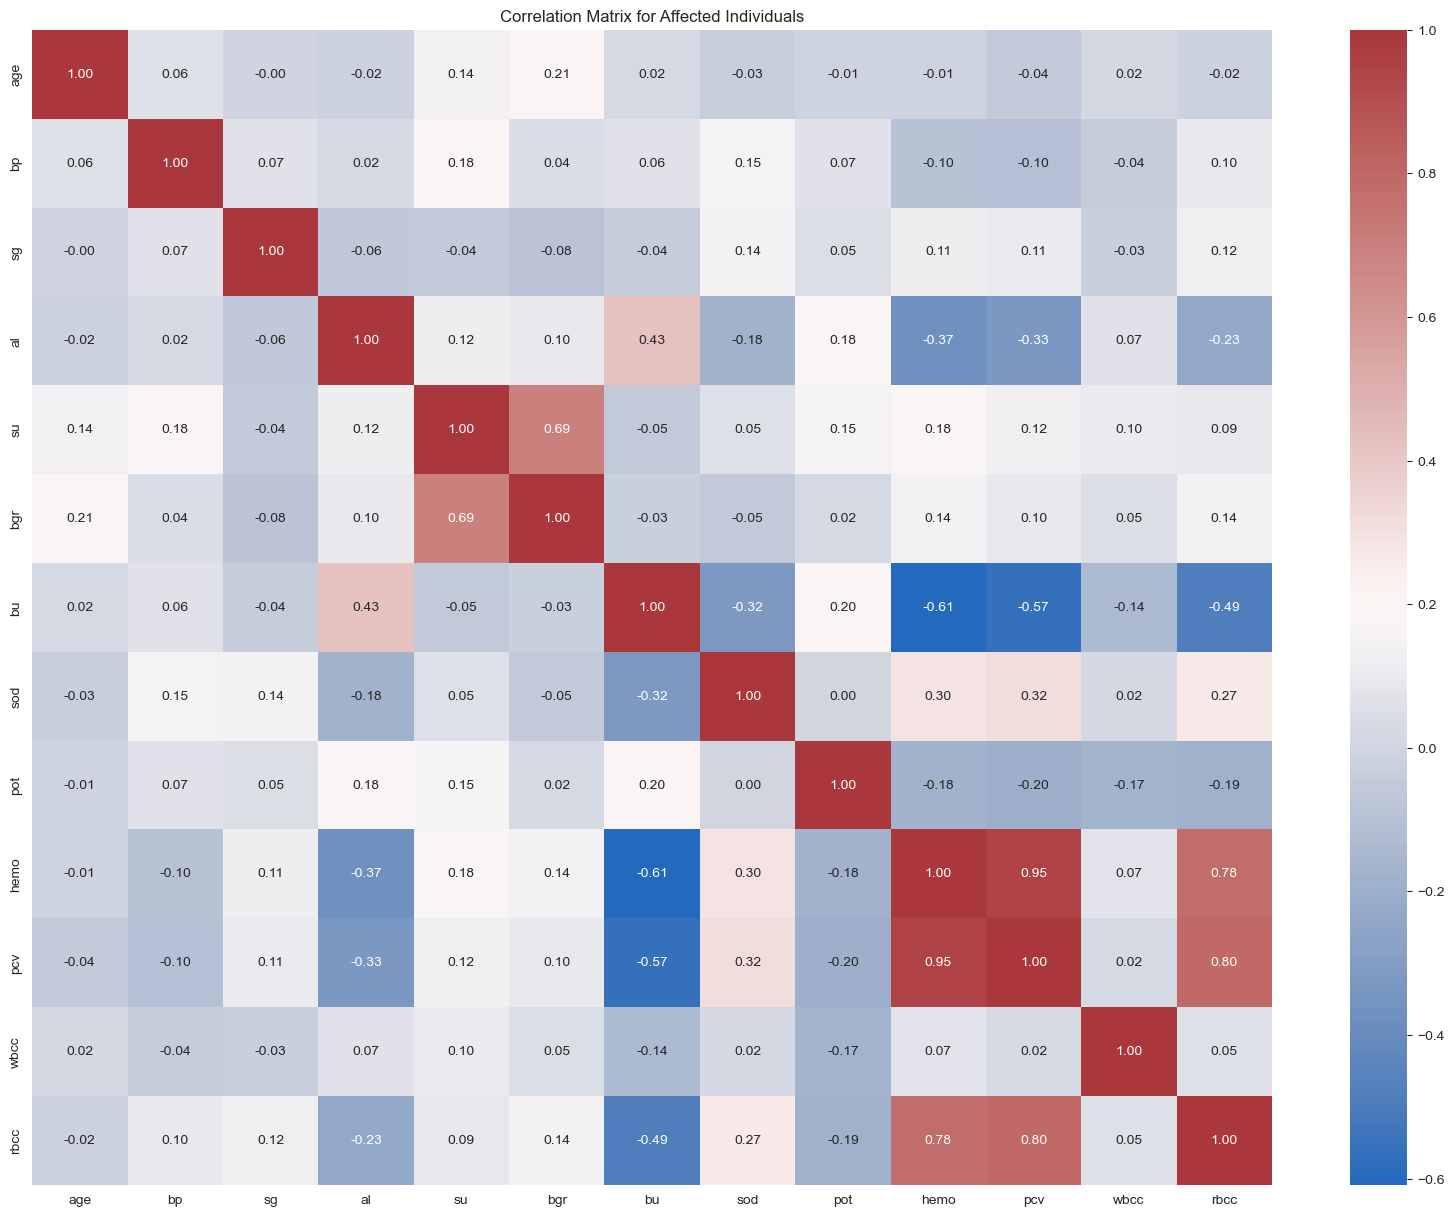

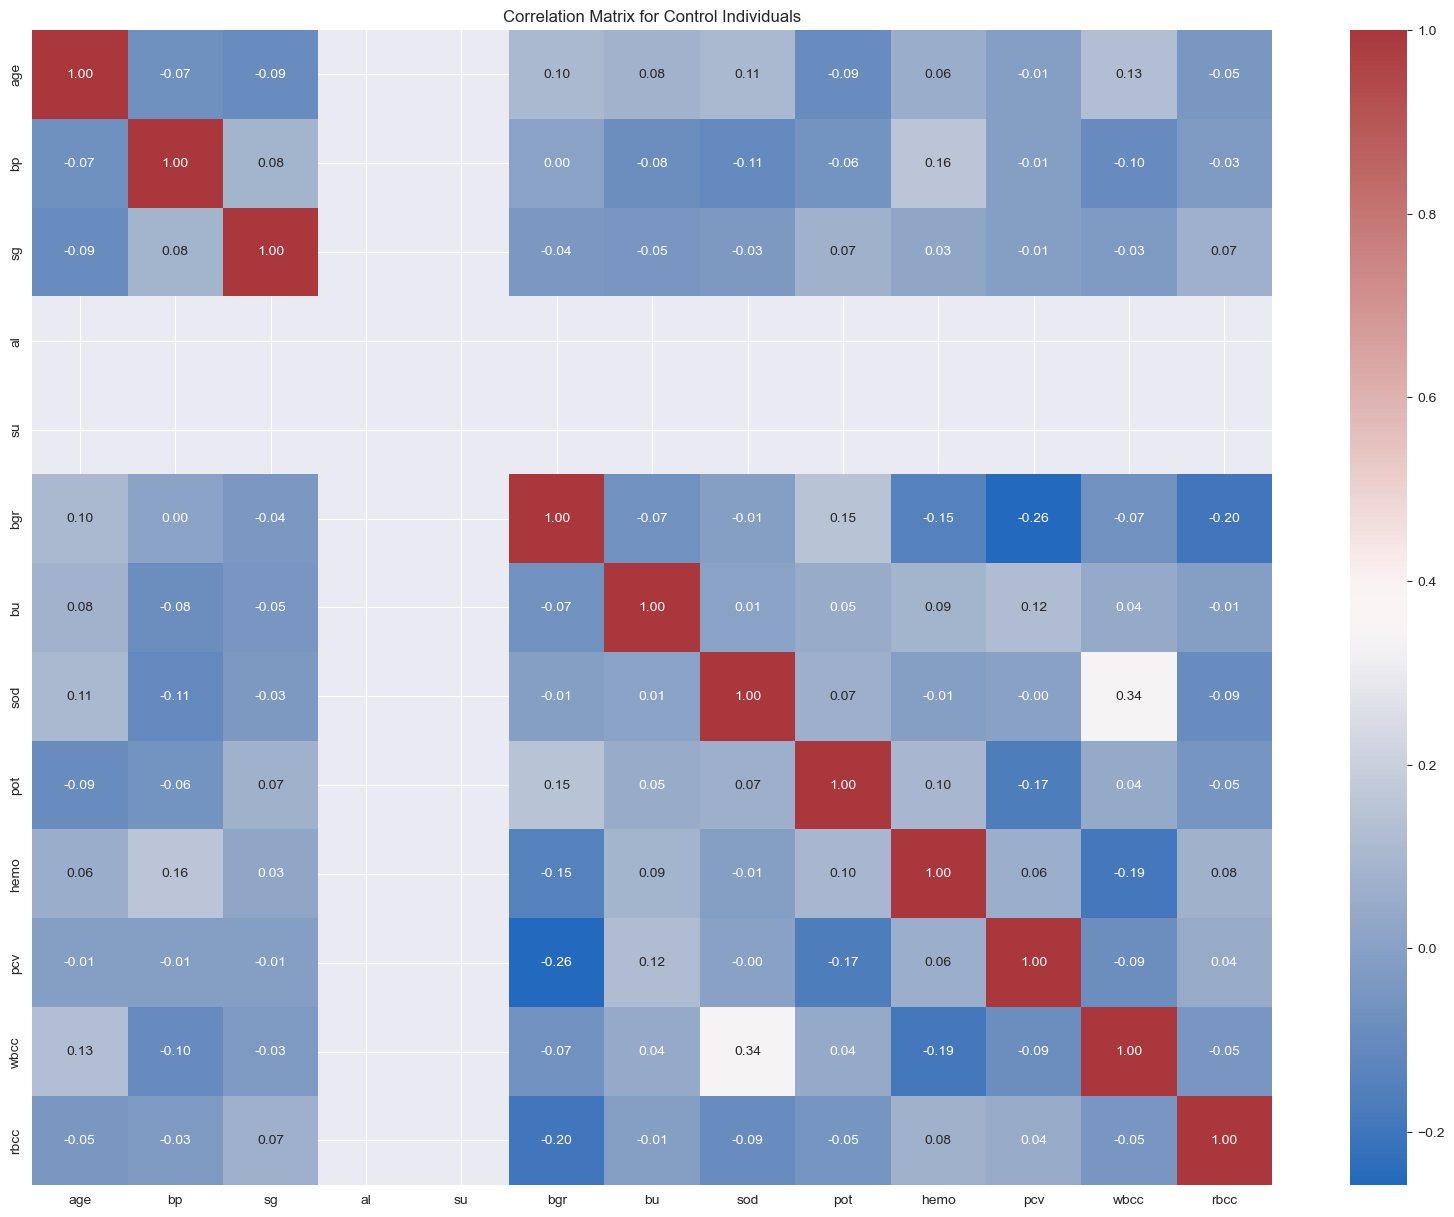

Text(0.5, 1.0, 'Correlation Matrix for Combined Individuals')

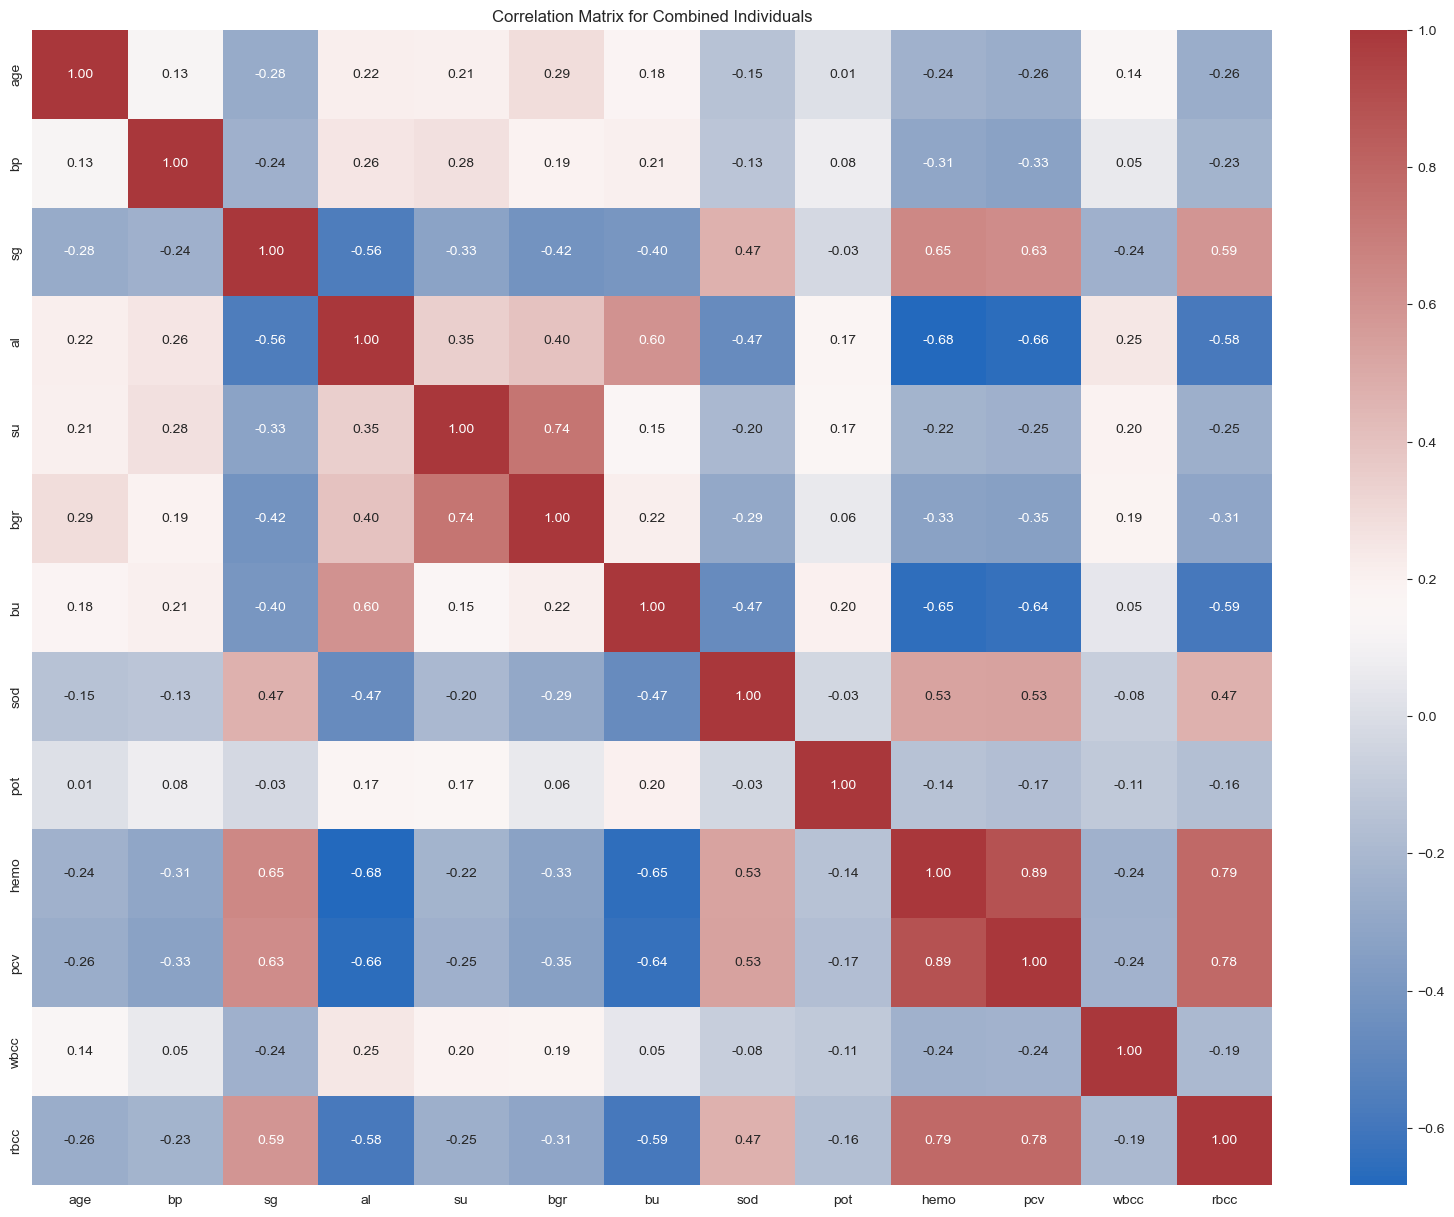

In [3]:
# Finally, calculate the correlation matrix and visualize it for each data frame. Clearly describe the results and your interpretation for it.
numeric_columns = filtered_df.select_dtypes(include=[np.number]).columns.tolist()

affected_corr = affected_df[numeric_columns].corr()
control_corr = control_df[numeric_columns].corr()
filtered_corr = filtered_df[numeric_columns].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(affected_corr, annot=True, cmap='vlag', fmt=".2f")
plt.title("Correlation Matrix for Affected Individuals")
plt.show()

plt.figure(figsize=(20, 15))
sns.heatmap(control_corr, annot=True, cmap='vlag', fmt=".2f")
plt.title("Correlation Matrix for Control Individuals")
plt.show()

plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr, annot=True, cmap='vlag', fmt=".2f")
plt.title("Correlation Matrix for Combined Individuals")





The results and interpretation for it:

1. Control Group
    - Most variables in the control group have weak correlations (close to 0), meaning they are not strongly related to each other.
    - Exception: Sodium (Sod) and Potassium (Pot) show a moderate positive correlation (0.34), which reflects normal body balance in healthy individuals.

2. Affected Group
    - Strong positive correlations are observed among blood health indicators:
      - Hemoglobin (Hemato), Packed Cell Volume (Pcv), and  Red Blood Cell Count (Rbcc) are closely related (e.g., Hemato and Pcv: 0.95).
    - Negative correlations:
      - Blood Urea (Bu) is strongly negatively correlated with Hemato (-0.61), Pcv (-0.57), and Rbcc (-0.49), indicating that poor kidney function impacts blood health.

3. Combined Dataset
    - The combined data reflects both control and affected group trends:
      - Blood health markers (Hemato, Pcv, Rbcc) remain strongly correlated.
      - Sugar (Su) and Blood Glucose (Bgr) have a moderate positive correlation (0.74), highlighting metabolic issues like diabetes.
      - Kidney function indicators (Bu and Sod) show negative correlations with blood health metrics.